In [9]:
!pip install tensorflow tensorflow_datasets


Defaulting to user installation because normal site-packages is not writeable


In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Загрузка датасета EMNIST (Letters)
(ds_train, ds_test), ds_info = tfds.load('emnist/letters', split=['train', 'test'], with_info=True, as_supervised=True)

# Нормализация данных и изменение формы
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Нормализация
    image = tf.expand_dims(image, -1)           # Добавление канала
    label = label - 1                           # Приведение меток к диапазону [0, 25]
    return image, label

# Применение предобработки к тренировочным и тестовым данным
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

# Батчирование и кэширование данных
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(128).cache().prefetch(tf.data.AUTOTUNE)


In [20]:
from tensorflow.keras import layers, models

# Создание модели
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 классов для 26 букв английского алфавита
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Отображение архитектуры модели
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,538 (439.60 KB)

 Trainable params: 112,538 (439.60 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Обучение модели
history = model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.5588 - loss: 1.4762 - val_accuracy: 0.7993 - val_loss: 0.5776
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.8374 - loss: 0.4906 - val_accuracy: 0.8346 - val_loss: 0.4728
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.8709 - loss: 0.3846 - val_accuracy: 0.8618 - val_loss: 0.4102
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 0.8898 - loss: 0.3220 - val_accuracy: 0.8710 - val_loss: 0.3699
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.9020 - loss: 0.2846 - val_accuracy: 0.8788 - val_loss: 0.3493
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.9072 - loss: 0.2624 - val_accuracy: 0.8769 - val_loss: 0.3685
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.9174 - loss: 0.2362 - val_accuracy: 0.8766 - val_loss: 0.3668
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 48s 69ms/step - accuracy: 0.9211 - loss: 0.2211 - 

In [22]:
# Оценка модели
test_loss, test_acc = model.evaluate(ds_test)
print(f"Точность на тестовом наборе: {test_acc * 100:.2f}%")


116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8915 - loss: 0.3317
Точность на тестовом наборе: 89.10%


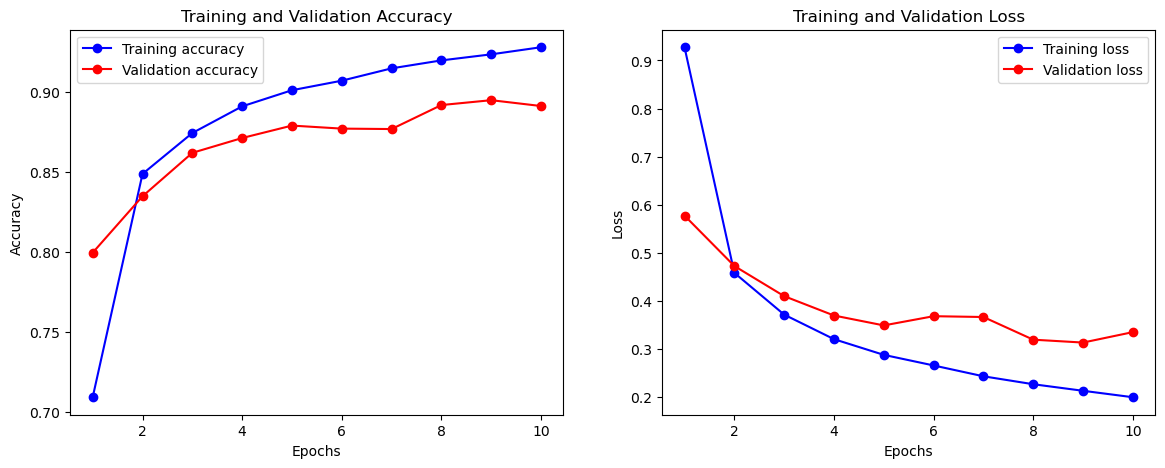

In [24]:
import matplotlib.pyplot as plt

# Функция для визуализации точности и ошибки
def plot_training_history(history):
    # Извлекаем значения точности и ошибки для обучения и валидации
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    # Построение графика точности
    plt.figure(figsize=(14, 5))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График ошибки
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Отображение графиков
    plt.show()

# Вызов функции для визуализации
plot_training_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


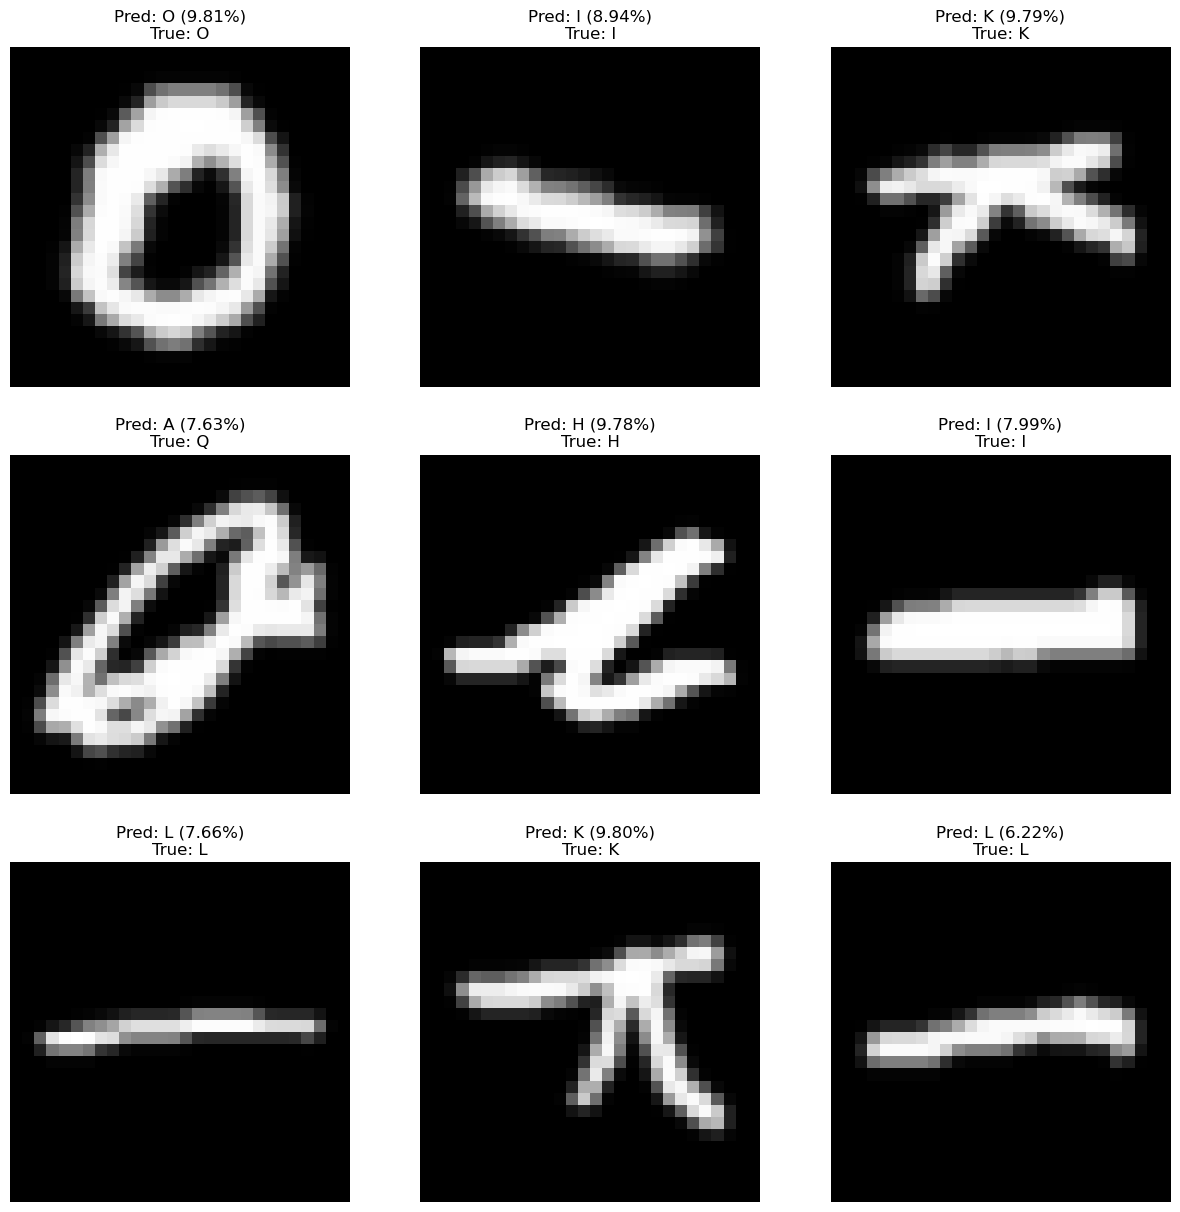

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def extract_samples(dataset, num_samples=100):
    """Извлекает случайные примеры из датасета"""
    all_images = []
    all_labels = []
    
    # Создаем список всех данных
    for img_batch, lbl_batch in dataset:
        all_images.extend(img_batch.numpy())
        all_labels.extend(lbl_batch.numpy())
        
        if len(all_images) >= num_samples:
            break

    all_images = np.array(all_images)[:num_samples]
    all_labels = np.array(all_labels)[:num_samples]
    
    return all_images, all_labels

def plot_random_predictions(model, dataset, num_samples=9):
    # Извлекаем случайные примеры
    images, labels = extract_samples(dataset, num_samples * 2)  # Берем больше, чтобы обеспечить достаточное количество
    
    # Выбираем случайные индексы
    random_indices = np.random.choice(len(labels), num_samples, replace=False)
    
    random_images = images[random_indices]
    random_labels = labels[random_indices]
    
    # Выполняем предсказания для случайных изображений
    predictions = model.predict(random_images)
    predicted_labels = np.argmax(predictions, axis=1)
    confidences = np.max(tf.nn.softmax(predictions, axis=1), axis=1)

    # Визуализация
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(random_images[i].squeeze(), cmap='gray')  # Отобразим изображение

        # Подпись с предсказанной буквой и процентом уверенности
        predicted_letter = chr(predicted_labels[i] + ord('A'))  # Преобразуем в английские буквы
        actual_letter = chr(random_labels[i] + ord('A'))
        confidence = confidences[i] * 100

        plt.title(f"Pred: {predicted_letter} ({confidence:.2f}%)\nTrue: {actual_letter}")
        plt.axis('off')

    plt.show()

# Применение функции для визуализации
plot_random_predictions(model, ds_test, num_samples=9)


## Обзор: "Neural Architecture Search with Reinforcement Learning"

### Введение

Одной из современных тенденций в области нейронных сетей является **Neural Architecture Search (NAS)**, то есть автоматизированный поиск архитектур нейронных сетей. В данной области выделяется работа "Neural Architecture Search with Reinforcement Learning" авторов Barret Zoph и Quoc V. Le, опубликованная в 2017 году. В этой работе предложен новый метод для автоматизированного поиска архитектур нейронных сетей с использованием методов **обучения с подкреплением (reinforcement learning, RL)**.

### Основная идея

Авторы предлагают использовать **обучение с подкреплением** для поиска архитектур нейронных сетей. В их методе создается **контроллер**, который генерирует гиперпараметры для сети (например, количество слоев, типы слоев и их конфигурации). Контроллер обучается, чтобы максимизировать производительность сгенерированных архитектур на валидационных данных.

### Архитектура

- **Контроллер (RNN):** Используется рекуррентная нейронная сеть (RNN) для генерации конфигураций архитектур. Эта сеть принимает случайный вектор состояния и генерирует описание архитектуры сети.
  
- **Пробные архитектуры (CNN):** Для каждой конфигурации, сгенерированной контроллером, строится нейронная сеть, которая обучается на стандартных датасетах (например, CIFAR-10 или ImageNet). Производительность этих сетей используется для обучения контроллера.

- **Обратная связь:** Производительность сети на валидационных данных используется как вознаграждение для обучения контроллера. Целью является нахождение конфигураций, которые обеспечивают высокую точность на валидационном наборе данных.

### Преимущества

1. **Автоматизация процесса:** NAS позволяет автоматизировать процесс проектирования архитектур, что может значительно ускорить создание эффективных сетей.
2. **Оптимизация архитектур:** Метод способен находить архитектуры, которые могут быть лучше традиционно созданных сетей, что может привести к улучшению производительности на различных задачах.
3. **Гибкость:** Подход может быть адаптирован для различных типов сетей и задач, включая задачи классификации, сегментации и другие.

### Недостатки и трудности

1. **Вычислительная сложность:** Процесс NAS требует значительных вычислительных ресурсов, поскольку для каждой сгенерированной архитектуры необходимо обучение и оценка производительности. Это может быть проблемой для небольших исследовательских групп или компаний с ограниченными ресурсами.
2. **Время обучения:** Обучение контроллера и последующая оптимизация могут занимать значительное время, что делает этот подход менее подходящим для быстрой разработки и прототипирования.
3. **Сложность интерпретации:** Обнаруженные архитектуры могут быть сложны для интерпретации и анализа, что может затруднить понимание и объяснение их работы.

### Практическое применение

В практике применения NAS с обучением с подкреплением могут возникать следующие трудности:

- **Необходимость в больших вычислительных мощностях:** На практике многие исследователи сталкиваются с нехваткой ресурсов для полноценного применения NAS. Использование облачных вычислений или распределенных систем может частично решить эту проблему, но также увеличивает затраты.
  
- **Проблемы с воспроизводимостью:** Полученные архитектуры могут быть трудны для воспроизведения из-за вариабельности в начальных условиях или случайности в процессе поиска.

- **Зависимость от данных:** Результаты поиска архитектур могут сильно зависеть от выбранных данных и задачи, что делает их менее универсальными для других проблем или наборов данных.

### Заключение

Работа "Neural Architecture Search with Reinforcement Learning" представляет собой важный шаг вперед в области автоматизированного поиска архитектур нейронных сетей. Хотя метод имеет несколько значительных преимуществ, таких как автоматизация и потенциальное улучшение производительности, он также сталкивается с рядом практических проблем, включая высокие вычислительные затраты и сложности в интерпретации. Эти аспекты следует учитывать при использовании NAS в реальных приложениях.